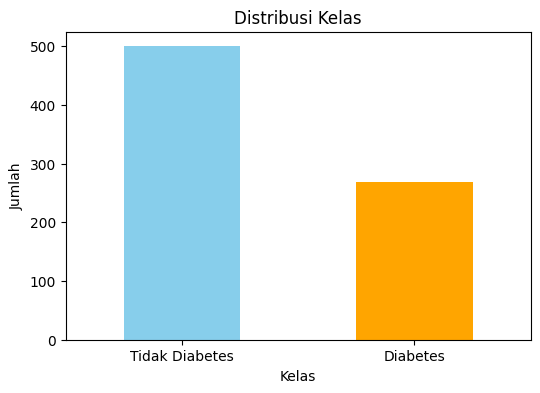

Akurasi: 0.72
Laporan Klasifikasi:
                precision    recall  f1-score   support

Tidak Diabetes       0.83      0.72      0.77       100
      Diabetes       0.58      0.72      0.64        54

      accuracy                           0.72       154
     macro avg       0.70      0.72      0.71       154
  weighted avg       0.74      0.72      0.73       154



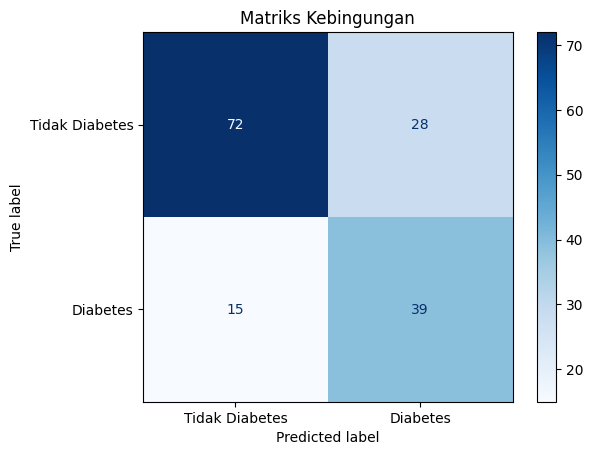

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Memuat dataset dari file CSV
path_dataset = "diabetes.csv"  # Ganti dengan path file dataset Anda
data = pd.read_csv(path_dataset)

# Memvisualisasikan distribusi kelas
plt.figure(figsize=(6, 4))
data["Outcome"].value_counts().plot(kind="bar", color=["skyblue", "orange"])
plt.title("Distribusi Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(ticks=[0, 1], labels=["Tidak Diabetes", "Diabetes"], rotation=0)
plt.show()

# Memisahkan fitur dan target
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# Membagi dataset menjadi data latih dan uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_latih, y_latih = smote.fit_resample(X_latih, y_latih)

# Normalisasi fitur
scaler = StandardScaler()
X_latih = scaler.fit_transform(X_latih)
X_uji = scaler.transform(X_uji)

# Membuat dan melatih model Naive Bayes
model = GaussianNB()
model.fit(X_latih, y_latih)

# Melakukan prediksi pada data uji
y_prediksi = model.predict(X_uji)

# Mengevaluasi model
akurasi = accuracy_score(y_uji, y_prediksi)
print(f"Akurasi: {akurasi:.2f}")
print("Laporan Klasifikasi:")
print(classification_report(y_uji, y_prediksi, target_names=["Tidak Diabetes", "Diabetes"]))

# Matriks Kebingungan
matriks_konfusi = confusion_matrix(y_uji, y_prediksi)
ConfusionMatrixDisplay(confusion_matrix=matriks_konfusi, display_labels=["Tidak Diabetes", "Diabetes"]).plot(cmap="Blues")
plt.title("Matriks Kebingungan")
plt.show()